In [1]:
import pandas as pd
import seaborn as sns

In [2]:
caminho = 'C:\Cursos\Impacta\mba\DNSE2017.csv'

In [3]:
sinasc = pd.read_csv(caminho, dtype=str)

In [4]:
sinasc.head(5)

,contador,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,...,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK
0,1,1,2415631,230440,1,24,2,4,999992,01,...,NaN,0,NaN,12,0,1,NaN,05,1,9
1,2,1,2005050,270030,1,34,5,4,622020,03,...,NaN,3,05042017,06,0,1,NaN,03,1,3
2,3,1,2005050,270030,1,19,2,4,622020,NaN,...,NaN,3,03042017,06,0,1,NaN,11,0,5
3,4,1,2005026,270030,1,19,2,4,999992,01,...,2,3,29042017,04,0,1,NaN,05,1,2
4,5,1,2722429,270400,1,16,1,4,999991,00,...,2,4,19042017,05,0,1,NaN,03,1,2


In [5]:
sinasc['PESO'] = pd.to_numeric(sinasc['PESO'])
sinasc['IDADEMAE'] = pd.to_numeric(sinasc['IDADEMAE'])
sinasc['IDADEPAI'] = pd.to_numeric(sinasc['IDADEPAI'])
sinasc['APGAR1'] = pd.to_numeric(sinasc['APGAR1'])
sinasc['APGAR5'] = pd.to_numeric(sinasc['APGAR5'])

sinasc['QTDFILVIVO'] = pd.to_numeric(sinasc['QTDFILVIVO']).astype(pd.Int64Dtype())
sinasc['QTDFILMORT'] = pd.to_numeric(sinasc['QTDFILMORT']).astype(pd.Int64Dtype())
sinasc['SEMAGESTAC'] = pd.to_numeric(sinasc['SEMAGESTAC']).astype(pd.Int64Dtype())
sinasc['CONSPRENAT'] = pd.to_numeric(sinasc['CONSPRENAT']).astype(pd.Int64Dtype())
sinasc['SERIESCMAE'] = pd.to_numeric(sinasc['SERIESCMAE']).astype(pd.Int64Dtype())
sinasc['QTDPARTCES'] = pd.to_numeric(sinasc['QTDPARTCES']).astype(pd.Int64Dtype())
sinasc['QTDPARTNOR'] = pd.to_numeric(sinasc['QTDPARTNOR']).astype(pd.Int64Dtype())
sinasc['QTDGESTANT'] = pd.to_numeric(sinasc['QTDGESTANT']).astype(pd.Int64Dtype())

In [6]:
colunas_medias = sinasc[['PESO','IDADEMAE','QTDFILVIVO','QTDFILMORT','APGAR1','APGAR5']]
medias = colunas_medias.mean().to_frame()
medias

,0
PESO,3223.196332
IDADEMAE,26.148079
QTDFILVIVO,1.123062
QTDFILMORT,0.310486
APGAR1,8.443829
APGAR5,9.526913


In [7]:
campos_mediana = sinasc[['IDADEMAE']]
medianas = campos_mediana.median().to_frame()
medianas

,0
IDADEMAE,26.0


In [8]:
campos_modas = sinasc[['APGAR1']]
modas = campos_modas.mode()
modas

,APGAR1
0,9.0


In [9]:
campos_modas = sinasc[['APGAR5']]
modas = campos_modas.mode()
modas

,APGAR5
0,10.0


In [10]:
campos_quantis = sinasc[['PESO']]
quantis = campos_quantis.quantile([0.1])
quantis

,PESO
0.1,2570.0


In [11]:
campos_quantis = sinasc[['PESO']]
quantis = campos_quantis.quantile([0.75])
quantis

,PESO
0.75,3575.0


In [12]:
sinasc['QTDFILMORT'] = pd.to_numeric(sinasc['QTDFILMORT'])
campos_modas = sinasc[['QTDFILMORT']]
modas = campos_modas.mode()
modas

,QTDFILMORT
0,0


In [13]:
escolaridade = sinasc[(sinasc.ESCMAE == '1') | (sinasc.ESCMAE == '2')]
escolaridade.QTDFILVIVO.quantile([0.25])

0.25    1
Name: QTDFILVIVO, dtype: object

In [14]:
sinascSE2 = sinasc[(sinasc.ESTCIVMAE == '1')]
sinascSE2.IDADEMAE.mean()


24.929703822047436

In [15]:
anomalia = sinasc[(sinasc.IDANOMAL == '1')]
anomalia.IDADEMAE.mode()

0    21
dtype: int64

In [16]:
anomalia.IDADEMAE.describe()

count    407.000000
mean      27.343980
std        7.373539
min       13.000000
25%       21.000000
50%       27.000000
75%       33.000000
max       47.000000
Name: IDADEMAE, dtype: float64

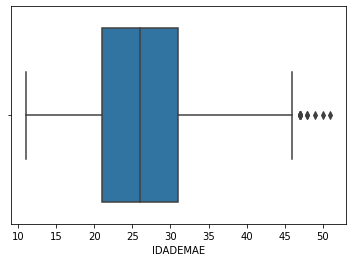

In [17]:
ax = sns.boxplot(sinasc['IDADEMAE'])
ax